In [2]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import permutation_importance
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder


In [3]:
# Load dataset
data = pd.read_csv("cleaned_data2_iotid23.csv")


In [4]:
# Encode categorical labels if necessary
if data["Label"].dtype == "object":
    label_encoder = LabelEncoder()
    data["Label"] = label_encoder.fit_transform(data["Label"])

# Split features and target
X = data.drop(columns=["Label"], errors="ignore")
y = data["Label"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [5]:
print(np.isinf(X_train).sum())


Protocol                        0
Flow Duration                   0
Total Fwd Packet                0
Total Length of Fwd Packet      0
Fwd Packet Length Max           0
Fwd Packet Length Min           0
Bwd Packet Length Max           0
Bwd Packet Length Min           0
Flow Bytes/s                  739
Flow Packets/s                739
Flow IAT Mean                   0
Flow IAT Std                    0
Flow IAT Max                    0
Fwd IAT Std                     0
Bwd IAT Mean                    0
Bwd IAT Std                     0
Packet Length Max               0
Packet Length Mean              0
FIN Flag Count                  0
SYN Flag Count                  0
RST Flag Count                  0
PSH Flag Count                  0
Down/Up Ratio                   0
Bwd Bulk Rate Avg               0
FWD Init Win Bytes              0
Bwd Init Win Bytes              0
Fwd Act Data Pkts               0
Fwd Seg Size Min                0
Active Mean                     0
Active Std    

In [6]:
X_train.replace([np.inf, -np.inf], np.nan, inplace=True)

In [7]:
print(X_train.describe())

            Protocol  Flow Duration  Total Fwd Packet  \
count  984321.000000   9.843210e+05     984321.000000   
mean        6.434105   5.241870e+06          5.387119   
std         4.921750   1.188713e+07        179.202228   
min         0.000000   0.000000e+00          1.000000   
25%         6.000000   3.359000e+03          1.000000   
50%         6.000000   6.640000e+03          1.000000   
75%         6.000000   3.117277e+06          2.000000   
max        17.000000   6.094632e+07      74180.000000   

       Total Length of Fwd Packet  Fwd Packet Length Max  \
count                9.843210e+05          984321.000000   
mean                 4.758162e+03             105.643710   
std                  4.324685e+05             824.255786   
min                  0.000000e+00               0.000000   
25%                  0.000000e+00               0.000000   
50%                  0.000000e+00               0.000000   
75%                  2.400000e+01              11.000000   
max   

In [8]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

In [10]:
import numpy as np

print(np.isnan(X_train).sum())  # Check for NaN values
print(np.isinf(X_train).sum())  # Check for Inf values

1478
0


In [11]:
X_train = np.nan_to_num(X_train, nan=0.0, posinf=0.0, neginf=0.0)

In [13]:
import numpy as np

print("NaN values in X_test:", np.isnan(X_test).sum())  # Count NaN values
print("Inf values in X_test:", np.isinf(X_test).sum())  # Count Inf values

NaN values in X_test: Protocol                      0
Flow Duration                 0
Total Fwd Packet              0
Total Length of Fwd Packet    0
Fwd Packet Length Max         0
Fwd Packet Length Min         0
Bwd Packet Length Max         0
Bwd Packet Length Min         0
Flow Bytes/s                  0
Flow Packets/s                0
Flow IAT Mean                 0
Flow IAT Std                  0
Flow IAT Max                  0
Fwd IAT Std                   0
Bwd IAT Mean                  0
Bwd IAT Std                   0
Packet Length Max             0
Packet Length Mean            0
FIN Flag Count                0
SYN Flag Count                0
RST Flag Count                0
PSH Flag Count                0
Down/Up Ratio                 0
Bwd Bulk Rate Avg             0
FWD Init Win Bytes            0
Bwd Init Win Bytes            0
Fwd Act Data Pkts             0
Fwd Seg Size Min              0
Active Mean                   0
Active Std                    0
Idle Mean         

In [14]:
mask = ~np.isnan(X_test).any(axis=1) & ~np.isinf(X_test).any(axis=1)
X_test = X_test[mask]
y_test = y_test[mask]  # Ensure labels match after filtering

In [15]:
# Train Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Get feature importance
feature_importances = pd.DataFrame(
    {"Feature": X.columns, "Importance": rf_model.feature_importances_}
).sort_values(by="Importance", ascending=True)

In [16]:

# Permutation importance
perm_importance = permutation_importance(rf_model, X_test, y_test, n_repeats=5, random_state=42)
perm_importances = pd.DataFrame({
    "Feature": X.columns,
    "Importance": perm_importance.importances_mean
}).sort_values(by="Importance", ascending=True)

# Display least important features
print("Least Important Features Based on Random Forest:")
print(feature_importances.head(10))

print("\nLeast Important Features Based on Permutation Importance:")
print(perm_importances.head(10))


c:\Users\emada\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
c:\Users\emada\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
c:\Users\emada\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
c:\Users\emada\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
c:\Users\emada\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but RandomForestClassifier was fitted without featur

Least Important Features Based on Random Forest:
               Feature  Importance
29          Active Std    0.000301
23   Bwd Bulk Rate Avg    0.000495
15         Bwd IAT Std    0.001327
14        Bwd IAT Mean    0.002338
21      PSH Flag Count    0.002861
28         Active Mean    0.002914
8         Flow Bytes/s    0.003395
26   Fwd Act Data Pkts    0.003642
31            Idle Std    0.004414
25  Bwd Init Win Bytes    0.004821

Least Important Features Based on Permutation Importance:
               Feature  Importance
0             Protocol         0.0
31            Idle Std         0.0
30           Idle Mean         0.0
29          Active Std         0.0
28         Active Mean         0.0
27    Fwd Seg Size Min         0.0
26   Fwd Act Data Pkts         0.0
25  Bwd Init Win Bytes         0.0
24  FWD Init Win Bytes         0.0
23   Bwd Bulk Rate Avg         0.0


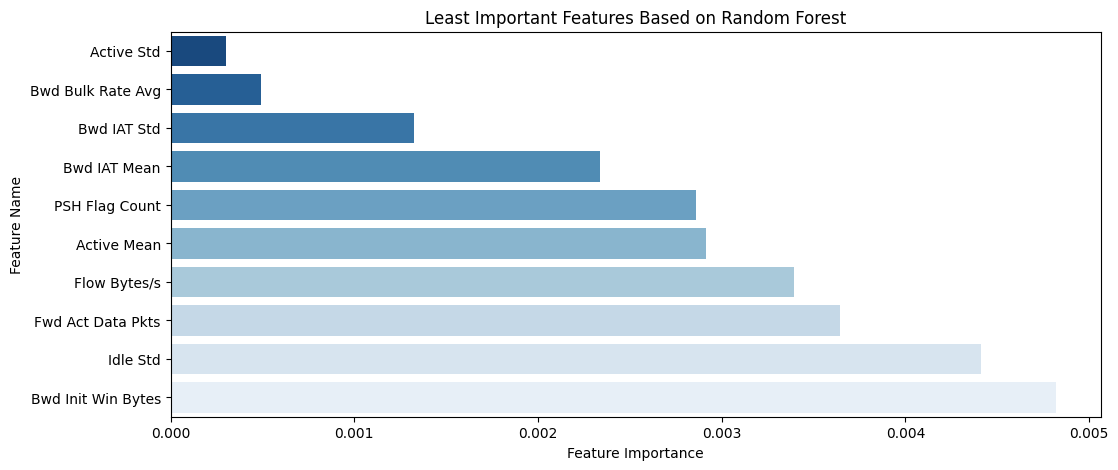

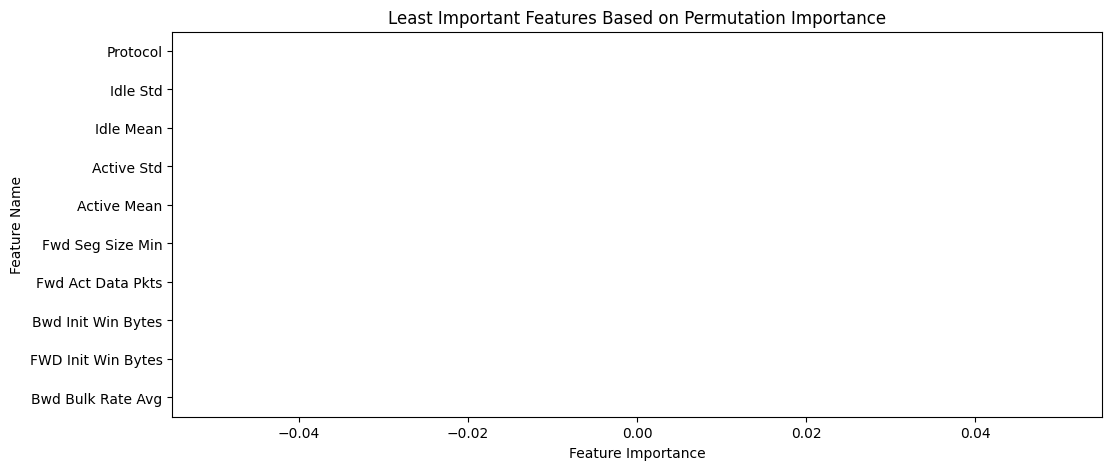

In [17]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Random Forest Feature Importance Data
rf_features = [
    "Active Std",
    "Bwd Bulk Rate Avg",
    "Bwd IAT Std",
    "Bwd IAT Mean",
    "PSH Flag Count",
    "Active Mean",
    "Flow Bytes/s",
    "Fwd Act Data Pkts",
    "Idle Std",
    "Bwd Init Win Bytes",
]
rf_importance = [
    0.000301,
    0.000495,
    0.001327,
    0.002338,
    0.002861,
    0.002914,
    0.003395,
    0.003642,
    0.004414,
    0.004821,
]

# Permutation Importance Data
perm_features = [
    "Protocol",
    "Idle Std",
    "Idle Mean",
    "Active Std",
    "Active Mean",
    "Fwd Seg Size Min",
    "Fwd Act Data Pkts",
    "Bwd Init Win Bytes",
    "FWD Init Win Bytes",
    "Bwd Bulk Rate Avg",
]
perm_importance = [0.0] * len(perm_features)  # All are zero importance

# Plot Random Forest Feature Importance
plt.figure(figsize=(12, 5))
sns.barplot(x=rf_importance, y=rf_features, palette="Blues_r")
plt.xlabel("Feature Importance")
plt.ylabel("Feature Name")
plt.title("Least Important Features Based on Random Forest")
plt.show()

# Plot Permutation Importance
plt.figure(figsize=(12, 5))
sns.barplot(x=perm_importance, y=perm_features, palette="Reds_r")
plt.xlabel("Feature Importance")
plt.ylabel("Feature Name")
plt.title("Least Important Features Based on Permutation Importance")
plt.show()


In [18]:
# List of least important features to drop
features_to_drop = [
    "Protocol",
    "Idle Std",
    "Idle Mean",
    "Active Std",
    "Active Mean",
    "Fwd Seg Size Min",
    "Fwd Act Data Pkts",
    "Bwd Init Win Bytes",
    "FWD Init Win Bytes",
    "Bwd Bulk Rate Avg",
]

# Drop the features from the dataset
df_cleaned = data.drop(columns=features_to_drop)

# Check the new dataset shape
print("Original dataset shape:", data.shape)
print("New dataset shape after feature removal:", df_cleaned.shape)


Original dataset shape: (1230402, 35)
New dataset shape after feature removal: (1230402, 25)
